<a href="https://colab.research.google.com/github/S-JZ/CodeInPlace2K21/blob/main/CIP2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mood Booster**
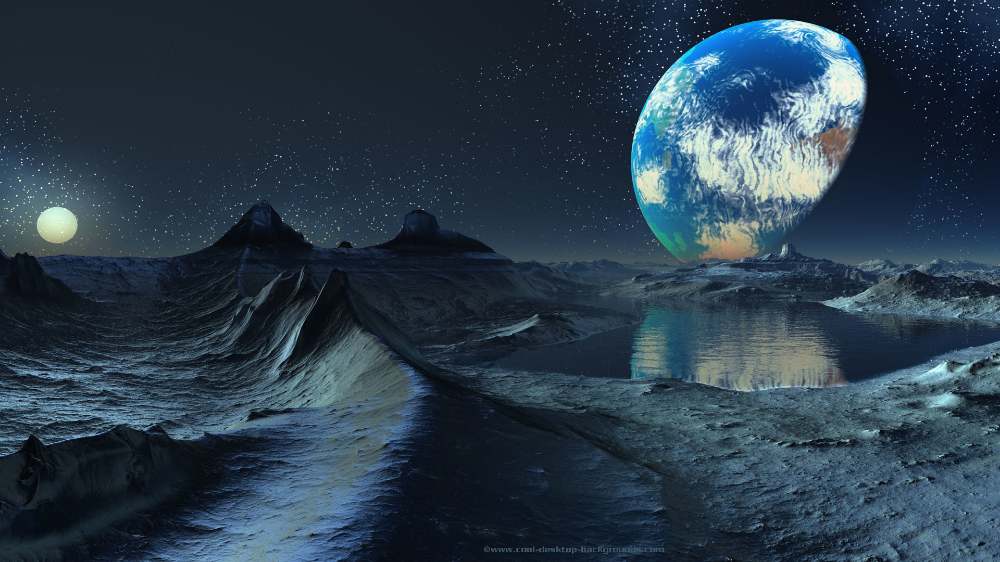

## *Importing the required libraries.*

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import requests
import json
from datetime import datetime 

In [ ]:
from PIL import Image
import urllib
import cv2 as cV2

### **A Paronama of Images.**

*Images Obtained from:* https://api.nasa.gov/

In [ ]:
#Connecting to NASA's Open API
def api_connect(url):
  url += "count=4&api_key=DEMO_KEY"
  image_data = json.loads(requests.get(url).text)
  return image_data

In [ ]:
# This creates the comic/cartoon effect on the images
def image_transform(filename):
  img = cV2.imread(filename)
  gray = cV2.cvtColor(img, cV2.COLOR_BGR2GRAY)
  gray = cV2.medianBlur(gray, 3)
  edges = cV2.adaptiveThreshold(gray, 255, cV2.ADAPTIVE_THRESH_MEAN_C, cV2.THRESH_BINARY, 7, 7)

  colour = cV2.bilateralFilter(img, 7, 250,250)
  comic = cV2.bitwise_and(colour, colour, mask=edges)
  cV2.imwrite(filename[:-4] + "1.jpg", comic)

In [ ]:
# The function saves the images and their comic counterparts while displaying information about each.
def main(media_info):
  for media in media_info:
    if media['media_type'] == 'image':
      title = media['title']
      caption = media['explanation'] 
      date = media['date']
      url_i = media['url']
      urllib.request.urlretrieve(url_i, title + ".jpg")
      print("This image was taken on " + str(datetime.fromisoformat(date)) + " and the title is " + title + ". " + caption)
      image_transform(title + ".jpg")
  return 
    

In [ ]:
# Main Function Call
if __name__ == "__main__":
  url = "https://api.nasa.gov/planetary/apod?"
  media_info = api_connect(url)
  main(media_info)

This image was taken on 2011-10-04 00:00:00 and the title is QR Codes: Not for Human Eyes. This communication was not meant for human eyes. It was not even meant for aliens eyes. It's an attempt to communicate directly with your smartphone. Cameras on many smartphones can image the above Quick Response (QR) code and then common applications can tell you what it means.  Sometimes the deciphered code will reveal a web site address, prompting the smartphone to then ask you if you want to access this address to learn more about the object. QR codes are two-dimensional analogs of bar codes that can be scanned in any orientation and tolerate several types of errors. These codes are being used increasingly as doors between real objects and web-based information about those objects, and so are popping up increasingly in unexpected places.  Anyone can create a QR code from any of several free online services, print it out, and affix it to an object. Although not meant to communicate with aliens